#I- Affichage des données MNIST

In [1]:
#importation de la base de donnée
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist["target"] = mnist["target"].astype(np.uint8)
np.random.seed(42)
m = 10000
idx = np.random.permutation(60000)[:m]
datas = mnist['data'][idx]
targets = mnist['target'][idx]

## 1- Utilisation de la méthode PCA

In [2]:
import sklearn as sk
pca=sk.decomposition.PCA(2) #importation de PCA avec 2 composantes
data_red_pca=pca.fit_transform(datas) #application de la méthode PCA sur les données
print(data_red_pca) #affichage des données réduites
#affichage de la dimension des données
print(datas.shape)
print(data_red_pca.shape)

[[-105.30830014 -493.64269537]
 [ 383.11605468  833.90897775]
 [ -41.33522267  267.78093473]
 ...
 [ 369.06645342 -874.20905489]
 [ 338.27512232  380.84715668]
 [-421.11289544  443.81178172]]
(10000, 784)
(10000, 2)


On a bien une réduction de la dimension des données : (10000, 784) --> (10000, 2)




7

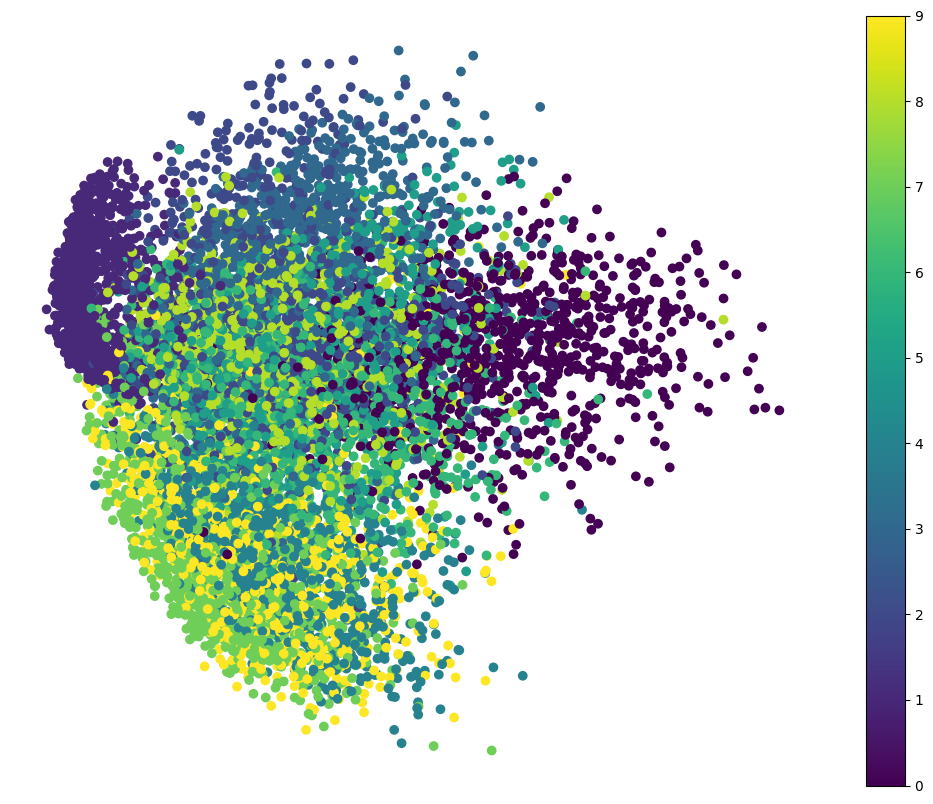

In [3]:
#affichage des données résuites sous forme de nuage de point
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 10))# Création d'une nouvelle figure avec une taille 13x10
# Création d'un nuage de points (scatter plot)
plt.scatter(data_red_pca[:,0],data_red_pca[:,1], c=targets) #[:,0] prend toutes les données de la premiere dimension et ,1 pour la deuxieme. c=targets : colore les points en fonction des valeurs des targets
plt.axis('off')
plt.colorbar()#ajoute la barre de couleur
plt.show()

Il donne une idée  de la structure des données. Les points correspondant aux mêmes chiffres (0-9) ont tendance à se regrouper en certaines zones de l'espace réduit à 2 dimensions. Cependant les groupes ne sont pas toujours bien séparés et laa distinction entre certaines classes peut être floue comme le 4 avec le 9

##2- Utilisation de la méthode t-SNE

10)

(10000, 2)


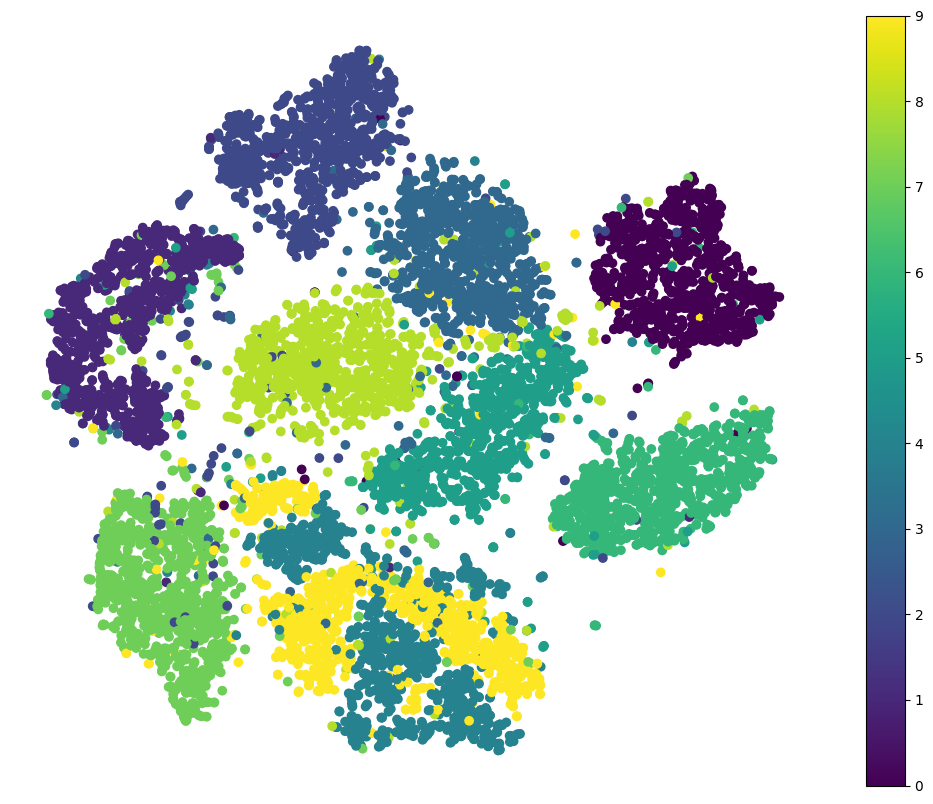

In [4]:
TSNE=sk.manifold.TSNE(2)  #importation de TSNE avec 2 composantes
TSNE_red=TSNE.fit_transform(datas)#application de la méthode TSNE sur les données
print(TSNE_red.shape)#affichage de la dimension des données
#on réaffiche les données réduite sous forme de nuage de points (on refait comme la question 7)
plt.figure(figsize=(13, 10))
plt.scatter(TSNE_red[:,0],TSNE_red[:,1], c=targets)
plt.axis('off')
plt.colorbar()
plt.show()

Oui, le 9 et le 4 par exemple.

13)

La méthode PCA est une réduction linéaire qui préserve la variance globale des données, tandis que t-SNE est non linéaire et préserve mieux les relations locales. Avec PCA, la séparation des classes est moins nette, certaines classes se chevauchent, alors que t-SNE forme des clusters bien distincts. Cependant, PCA est très rapide alors que t-SNE est plus lent. Pour conclure, PCA est plus adapté pour réduire la dimension efficacement, tandis que t-SNE est meilleur pour la visualisation des données complexes.

# II- PCA sur les données MNIST

##1- Résultats de RandomForest SANS la réduction de la dimensionnalité des données

16)

In [5]:
datas_train,labels_train,datas_test,labels_test=mnist['data'][:60000],mnist['target'][:60000],mnist['data'][60000:],mnist['target'][60000:] #on divise la base de donnée en base d'apprentissage et base de test
#affichage des dimensions des données
print(datas_train.shape)
print(labels_train.shape)
print(datas_test.shape)
print(labels_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


17)

In [6]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=100) #crée un objet de la classe RandomForestClassifier avec un nombre d'estimateur de 100

import time
start_time = time.time()#calcul du nombre de secondes passé depuis le 01/01/1970
foret_train=random_forest_classifier.fit(datas_train, labels_train)
print("--- %s seconds ---" % (format(time.time() - start_time,'.2f')))#affichage du temps avec 2 décimales
end_time= time.time()#calcul du nombre de secondes passé depuis le 01/01/1970
print("--- %s seconds ---" % ((format(time.time() - end_time,'.2f'))))#affichage du temps avec 2 décimales

difference = end_time - start_time #calcul du temps d'execution
print("Temps d'exécution de l'apprentissage :", format(difference, '.2f'), "secondes")#affichage du temps avec 2 décimales



--- 62.49 seconds ---
--- 0.00 seconds ---
Temps d'exécution de l'apprentissage : 62.49 secondes


In [7]:
# d.i. Prédiction des labels sur la base de test
target_pred = foret_train.predict(datas_test)
print(target_pred)
# d.ii. Calcul et affichage du taux de classification
accuracy = sk.metrics.accuracy_score(labels_test,target_pred)
print("Taux de classification :", format(accuracy * 100, '.2f'), "%")

[7 2 1 ... 4 5 6]
Taux de classification : 96.93 %


On obtient un très bon taux de classification

## 2- Résultats de RandomForest AVEC la réduction de la dimensionnalité des données

19)

In [8]:
import sklearn as sk
PCA_aprentissage=sk.decomposition.PCA(0.95)#application de la méthode PCA sur la base d'apprentissage avec une variance ratio de 95%
PCA_appr_train=PCA_aprentissage.fit_transform(datas_train)
print(PCA_appr_train)
print(datas_train.shape)
print(PCA_appr_train.shape)

[[ 123.93258866  312.67426202   24.51405176 ...   55.01899792
    20.08327427   39.58995229]
 [1011.71837587  294.85703827 -596.33956104 ...    7.24129874
    12.45780869  -12.7432306 ]
 [ -51.84960805 -392.17315286  188.50974943 ...  -54.19582221
   -48.47979747  -73.27826256]
 ...
 [-178.0534496  -160.07821109  257.61308227 ...   55.54485537
   -87.99883556   -5.78979735]
 [ 130.60607208    5.59193642 -513.85867395 ...   23.30835402
    -5.06237836  -65.26525587]
 [-173.43595244   24.71880226 -556.01889393 ...   52.4956069
   -12.63192292  -45.74001227]]
(60000, 784)
(60000, 154)


si on veut conserver 95% de la variance la dimension des données doivent être au minimum de (8000,154)

20)

In [9]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(100) #crée un objet de la classe RandomForestClassifier
import time
start_time = time.time()
PCA_foret=random_forest_classifier.fit(PCA_appr_train, labels_train)#entrainement des données avec un random forest classifier
end_time= time.time()

difference = end_time - start_time #calcul du temps d'execution
print("Temps d'exécution de l'apprentissage :", format(difference, '.2f'), "secondes")



Temps d'exécution de l'apprentissage : 197.40 secondes


On s'attend à trouver un temps d'éxécution plus rapide mais celui ci est en réalité plus lent. Cela peut être dû à réduction de dimension est trop faible ou si une grande quantité d'information est perdue.

21)

In [10]:
#on applique PCA sur la base de test
PCA_appr_test=PCA_aprentissage.transform(datas_test)
print(PCA_appr_test)
print(datas_test.shape)
print(PCA_appr_test.shape)

[[-332.27116927 -747.7987162    42.84481899 ...  -13.86295538
     6.67554493   11.18719639]
 [  20.69696209  955.58458273  152.71551708 ...   23.8340638
   -26.7303903   -36.52177944]
 [-946.02686793  430.84318261  -66.17633643 ...  -48.83348842
    29.01139318   -5.0090213 ]
 ...
 [-270.18775455 -596.87008733 -355.11067576 ...  -17.08482703
   -50.06267645   80.05821997]
 [-314.0271918   108.60355644 -642.83980125 ...   -8.2009258
   -24.81251641  -50.90062395]
 [1042.38930719   90.5147068  -706.11902876 ...   24.27323484
     8.78000162  -47.78002367]]
(10000, 784)
(10000, 154)


22)

In [11]:
debut_timer=time.time()

target_pred = PCA_foret.predict(PCA_appr_test)

fin_timer=time.time()


accuracy = sk.metrics.accuracy_score(labels_test,target_pred)
print("Taux de classification :", format(accuracy * 100, '.2f'), "%")

Taux de classification : 94.86 %


23)

In [12]:

difference = fin_timer - debut_timer
print("Temps d'exécution de l'apprentissage :", format(difference, '.2f'), "secondes")

Temps d'exécution de l'apprentissage : 0.33 secondes


On obtient cette fois ci un taux de classification légèrement plus faible que la question 17 mais cette fois ci le temps d'execution est beaucoup plus rapide. PCA permet de réduire la dimensionnalité des données, ce qui signifie que RandomForest devra traiter moins de caractéristiques pendant l'apprentissage. Cela permet d'accélérer l'entraînement.

##3- Résultats de Softmax SANS la réduction de la dimensionnalité des données

In [13]:
debut_timer=time.time()

LReg=sk.linear_model.LogisticRegression(max_iter=1000)#création d'un objet de la classe LogisticRegression
LReg_train=LReg.fit(datas_train,labels_train)#entrainement des donné
fin_timer=time.time()


difference = fin_timer - debut_timer
print("Temps d'exécution de l'apprentissage :", format(difference, '.2f'), "secondes")#affichage du temps d'execution



target_pred = LReg.predict(datas_test)#évaluation du modèle sur la base de test
accuracy = sk.metrics.accuracy_score(labels_test,target_pred) #calcul du taux de classification
print("Taux de classification :", format(accuracy * 100, '.2f'), "%")

Temps d'exécution de l'apprentissage : 406.47 secondes
Taux de classification : 92.10 %


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


l'apprentissage est plus lent et moins précis malgré le nombre de dimensions faible

## 4- Résultats de Softmax AVEC la réduction de la dimensionnalité des données

In [14]:
debut_timer=time.time()

Lreg_PCA=LReg.fit(PCA_appr_train,labels_train)#entrainement des données réduites après PCA
fin_timer=time.time()

difference = fin_timer - debut_timer
print("Temps d'exécution de l'apprentissage :", format(difference, '.2f'), "secondes")

Temps d'exécution de l'apprentissage : 149.27 secondes


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Oui, celui ci est beaucoup plus rapide. L'entrainement des données est accéléré grâce à PCA

29

In [15]:

PCA_test=PCA_aprentissage.fit_transform(datas_test)#application de PCA sur la base de test
print(datas_train.shape)
print(PCA_test.shape)

(60000, 784)
(10000, 149)


30

In [16]:
target_pred = LReg.predict(PCA_appr_test)#evaluation du modèle d'apprentissage sur la base de test
accuracy = sk.metrics.accuracy_score(labels_test,target_pred)#calcul du taux de classification
print("Taux de classification :", format(accuracy * 100, '.2f'), "%")

Taux de classification : 92.36 %


On obtient un taux de classification similaire à la question 26 mais cette technique est beaucoup plus rapide

31

In [17]:
print("Temps d'exécution de l'apprentissage :", format(difference, '.2f'), "secondes")

Temps d'exécution de l'apprentissage : 149.27 secondes


 L'application de PCA est fructueuse pour accélérer l'apprentissage, car elle réduit la taille de l'espace des caractéristiques. Cependant le taux de classification n'augmente pas mais reste similaire


32

PCA contribue généralement à accélérer le temps de calcul du modèle d'apprentissagesi cependant si le calcul de PCA est trop coûteux ou si trop de dimensions sont perdues, cela peut nuire au temps de calcul et à la performance du modèle. Pour conclure PCA accélère le temps de calcul dans de nombreux cas, mais il faut veiller à ce qu'il y ait un bon équilibre entre réduction de la dimensionnalité et conservation de l'information pour que l'impact soit bénéfique.